In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import eurec4a
import xarray as xr

#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

params = {
#"figure.figsize" :  [3.36, 2.976],  # figure size in inches
#                       "figure.dpi"     :  300,       # figure dots per inch
#                       "font.size"      :  8,       # this one acutally changes tick labels
#                       "font.family"    : "Times New Roman",
                      'svg.fonttype'    : 'none',  # plot text as text - not paths or clones or other nonsense
                       'svg.fonttype'    : 'none',  # plot text as text - not paths or clones or other nonsense
                       "ytick.labelsize": 8, # for colorbar ticks
                       "xtick.labelsize": 8, 
                       "axes.labelsize" : 8, # for colorbar labels
}

plt.rcParams.update(params)

In [2]:
# pip install eurec4a intake xarray intake-xarray zarr dask requests
# see https://howto.eurec4a.eu

cat = eurec4a.get_intake_catalog()
botany_cat = cat.simulations.DALES.botany

ds_timeseries = botany_cat.dx100m.nx1536['timeseries'].to_dask()
ds_profiles   = botany_cat.dx100m.nx1536['profiles'].to_dask()
ds_cross      = botany_cat.dx100m.nx1536['cross_xy'].to_dask()
ds_2D         = botany_cat.dx100m.nx1536['2D'].to_dask()
ds_3D         = botany_cat.dx100m.nx1536['3D'].to_dask()

# dimensions: ensemble_member, time, [z, y, x]

In [3]:
start_time = np.datetime64('2020-02-01')
# convert datetime64 to hours since simulation started
def to_hours(t64):
    return (t64 - start_time) / np.timedelta64(1, 'h')

Text(0, 0.5, 'cloud fraction')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


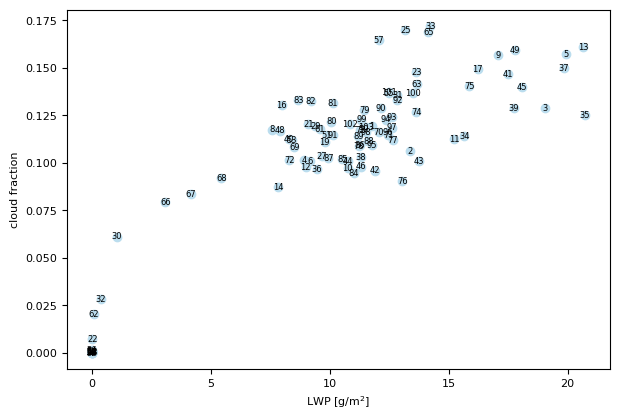

In [5]:
# select last 24h 
ts = ds_timeseries.sel(time=slice("2020-02-02T12:00", "2020-02-03T12:00"))

lwp = ts['lwp_bar'].mean(dim='time') * 1000
rwp = ts['rwp_bar'].mean(dim='time') * 1000
cf  = np.maximum(0, ts['cfrac']).mean(dim='time')
member = cf['member']

plt.figure(figsize=(7, 7*2/3))
plt.plot(lwp, cf, 'o', color='#bde')

#lwp_min = 0.0023           # optionally omit the dry corner
#plt.xlim((lwp_min,0.023)) 
#plt.ylim((0.075, 0.180))
for l, c, m in zip(lwp.values, cf.values, member.values):
    #if l > lwp_min:
    if True:
        plt.text(l, c, str(m), color="black", fontsize=6,
                horizontalalignment='center',
                verticalalignment='center')

plt.xlabel('LWP [g/m$^2$]')
plt.ylabel('cloud fraction')
#plt.savefig('scatter2.svg')

Text(0, 0.5, 'RWP (g/m$^2$)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


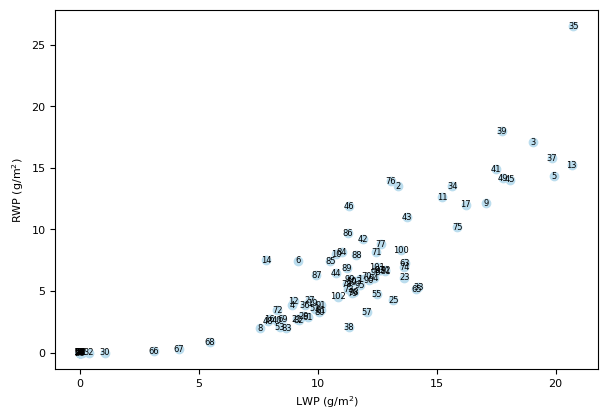

In [5]:
plt.figure(figsize=(7, 7*2/3))
plt.plot(lwp, rwp, 'o', color='#bde')

for l, r, m in zip(lwp.values, rwp.values, member.values):
    #if l > lwp_min:
    if True:
        plt.text(l, r, str(m), color="black", fontsize=6,
                horizontalalignment='center',
                verticalalignment='center')

plt.xlabel('LWP [g/m$^2$]')
plt.ylabel('RWP [g/m$^2$]')
